In [8]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np

# 1. For S gate

In [18]:
def s_gate():
    qc = QuantumCircuit(1)
    qc.s(0)
    return qc.to_gate(label="S gate")

controlled_S_gate = s_gate().control(1) 

In [28]:
qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)

q0, q1 = qr
qc.h(q0) # auxiliary qubit
qc.x(q1) # system qubit i.e. eigenstate |1>

# step 1
k = 1 # will get phi_2
for i in range(2**k):
    qc.append(controlled_S_gate,[q0,q1])

qc.h(q0) # measure in X basis
c0, c1 = cr
qc.measure(q0, c0)


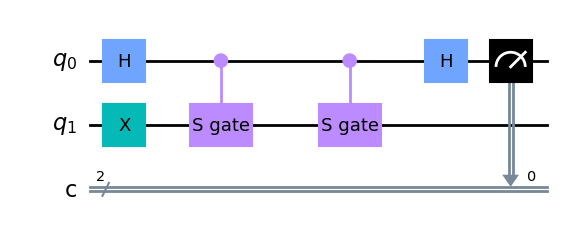

In [29]:
qc.draw(output='mpl')

In [21]:
# !pip install pylatexenc

In [22]:
# reinitialize auxiliary qubit
qc.reset(q0)
qc.h(q0)

In [23]:
# phase correction from m1
c0, c1 = cr
with qc.if_test((c0, 1)):
    qc.p(-np.pi / 2, q0)

In [24]:
# step 2
k = 0 # will get phi_2
for i in range(2**k):
    qc.append(controlled_S_gate,[q0,q1])
qc.h(q0) # measure in X basis
qc.measure(q0, c1)

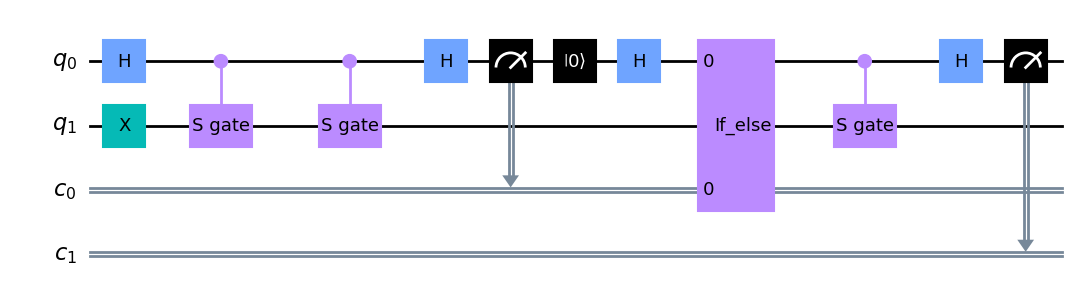

In [26]:
qc.draw(output='mpl')

In [27]:
from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
counts

{'01': 1000}

In [43]:
phi_bin = list(counts.keys())[0]
phase = 0
for i in range(len(phi_bin)):
    phi_i = int(phi_bin[i])
    phase = phase + phi_i*(2**(-1*(i+1)))
phase

0.25

# 2. For T gate

In [49]:
def t_gate():
    qc = QuantumCircuit(1)
    qc.t(0)
    return qc.to_gate(label="T gate")

controlled_T_gate = t_gate().control(1) 

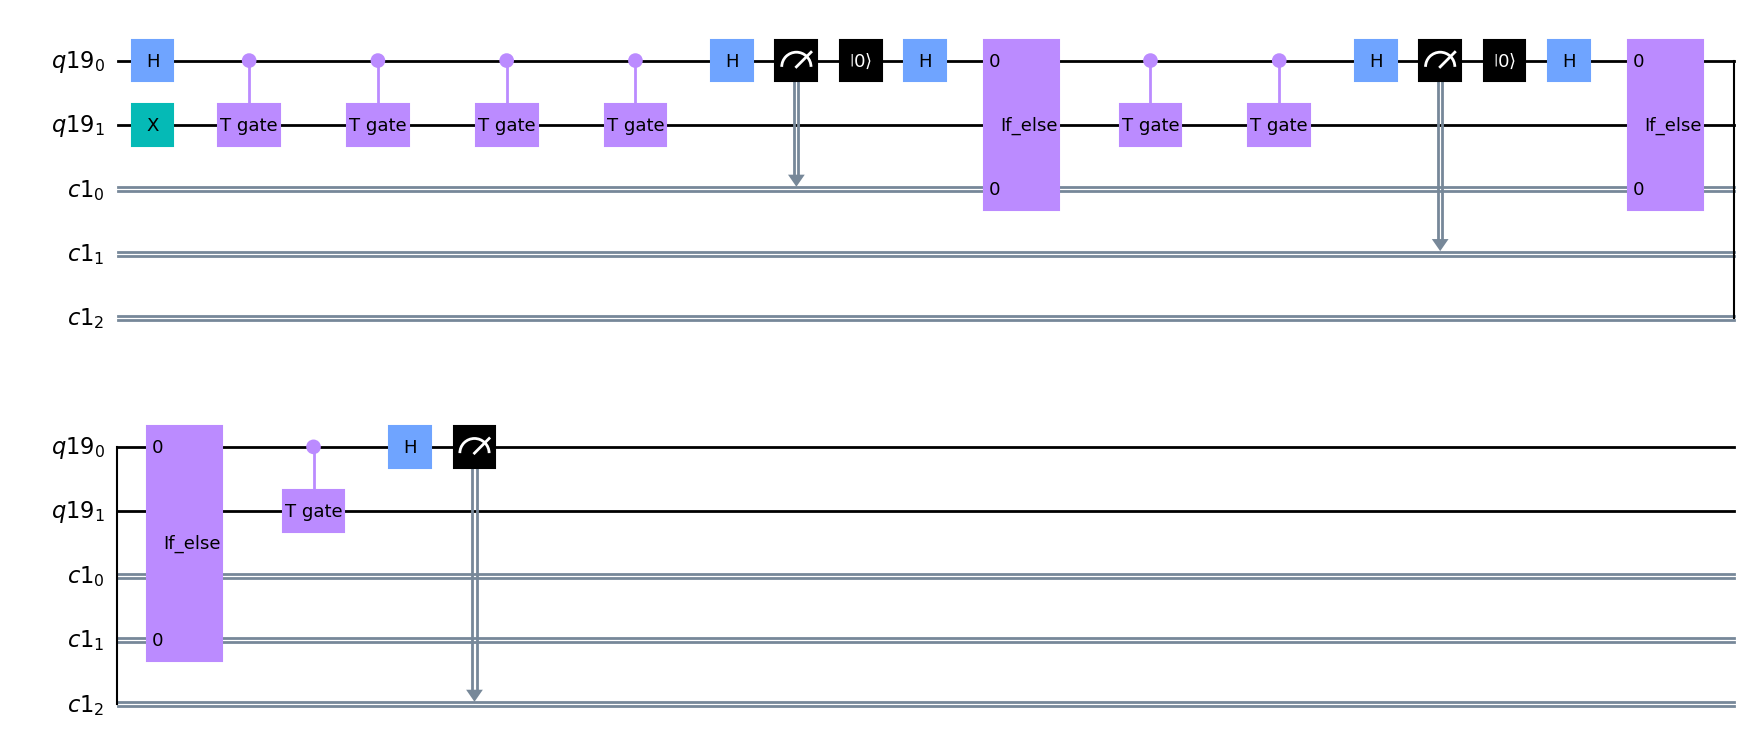

In [50]:
qr, cr = QuantumRegister(2), ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# initialize
qc.h(qr[0])
qc.x(qr[1])

# step 1
k = 2
for i in range(2**k):
    qc.append(controlled_T_gate, qr)

# base pauli X
qc.h(qr[0])

qc.measure(qr[0],cr[0])

# reset aux qubit 0
qc.reset(qr[0])
# reinitialize
qc.h(qr[0])

# phase correction
with qc.if_test((cr[0], 1)):
    qc.p(-np.pi/2, qr[0])

# step 2
k = 1
for i in range(2**k):
    qc.append(controlled_T_gate, qr)
    
# base pauli X
qc.h(qr[0])

qc.measure(qr[0],cr[1])

# reset aux qubit 0
qc.reset(qr[0])
# reinitialize
qc.h(qr[0])

# phase correction
with qc.if_test((cr[0], 1)):
    qc.p(-np.pi/4, qr[0])
with qc.if_test((cr[1], 1)):
    qc.p(-np.pi/2, qr[0])


# step 3
k = 0
for i in range(2**k):
    qc.append(controlled_T_gate, qr)
    
# base pauli X
qc.h(qr[0])

qc.measure(qr[0],cr[2])

qc.draw(output='mpl')

In [51]:
from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
counts

{'001': 1000}